In [16]:
import tweepy
import csv
import numpy as np
from textblob import TextBlob
from keras.models import Sequential
from keras.layers import Dense


#Step 1 - Insert your API keys
# Step 1 - Authenticate
consumer_key= 'M1hZhVd4ddTZxD2e9GwlCiiB7'
consumer_secret= 'EuLCDZIogr5cDTZ1mtgjLRvRxrMGPOk3Kbbu4jCDf6Wl7ZFmiA'

access_token='1386679274-C7LQOTmM1M66UGFwdnnzblGi6GYIpNfk0ugRIMl'
access_token_secret='4wTd7MlK4fqhYtlpYd9jLmciHfsu9XdnoqnVrH71YO0al'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

#Step 2 - Search for your company name on Twitter
public_tweets = api.search('company_name')


#Step 3 - Define a threshold for each sentiment to classify each 
#as positive or negative. If the majority of tweets you've collected are positive
#then use your neural network to predict a future price
for tweet in public_tweets:    
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)

#data collection
dates = []
prices = []
def get_data(filename):
	with open(filename, 'r') as csvfile:
		csvFileReader = csv.reader(csvfile)
		next(csvFileReader)
		for row in csvFileReader:
			dates.append(int(row[0].split('-')[0]))
			prices.append(float(row[1]))
	return

#Step 5 reference your CSV file here
get_data('your_company_stock_data.csv')

#Step 6 In this function, build your neural network model using Keras, train it, then have it predict the price 
#on a given day. We'll later print the price out to terminal.
def predict_prices(dates, prices, x):
    predicted_price = predict_price(dates, prices, 29)
    print(predicted_price)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.75, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.8333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)


FileNotFoundError: [Errno 2] No such file or directory: 'your_company_stock_data.csv'

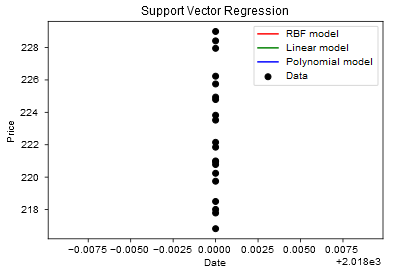

In [37]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


# plt.switch_backend('newbackend')  



dates = []
prices = []

def get_data(filename):
	with open(filename, 'r') as csvfile:
		csvFileReader = csv.reader(csvfile)
		next(csvFileReader)	# skipping column names
		for row in csvFileReader:
			dates.append(int(row[0].split('-')[0]))
			prices.append(float(row[1]))
	return

def predict_price(dates, prices, x):
	dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1

	svr_lin = SVR(kernel= 'linear', C= 1e3)
	svr_poly = SVR(kernel= 'poly', C= 1e3, degree= 2)
	svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) # defining the support vector regression models
	svr_rbf.fit(dates, prices) # fitting the data points in the models
	svr_lin.fit(dates, prices)
	svr_poly.fit(dates, prices)

	plt.scatter(dates, prices, color= 'black', label= 'Data') # plotting the initial datapoints 
	plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') # plotting the line made by the RBF kernel
	plt.plot(dates,svr_lin.predict(dates), color= 'green', label= 'Linear model') # plotting the line made by linear kernel
	plt.plot(dates,svr_poly.predict(dates), color= 'blue', label= 'Polynomial model') # plotting the line made by polynomial kernel
	plt.xlabel('Date')
	plt.ylabel('Price')
	plt.title('Support Vector Regression')
	plt.legend()
	plt.show()

	return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

get_data('aapl.csv') # calling get_data method by passing the csv file to it
#print "Dates- ", dates
#print "Prices- ", prices

predicted_price = predict_price(dates, prices, 29)  